<a href="https://colab.research.google.com/github/mxnlmn/ML4.4_PW/blob/main/%D0%A2%D0%B8%D0%BC%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9F%D0%A0_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163497 sha256=76ca103085217d22c71206b607973fe977adb0649229f7e34d5a81b7a85ccf61
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import Dataset
from surprise import SVD, SVDpp, NMF, KNNBasic, KNNWithZScore
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Використати датасет   movielens-100k`

In [3]:
data = Dataset.load_builtin(name='ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


Для кращого розуміння роздрукуйте датасет.

In [4]:
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print(df.head())

  user item  rating  timestamp
0  196  242     3.0  881250949
1  186  302     3.0  891717742
2   22  377     1.0  878887116
3  244   51     2.0  880606923
4  166  346     1.0  886397596


Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір

In [5]:
svd_alg = SVD()
svdpp_alg = SVDpp()
nmf_alg = NMF()
knnbasic_alg = KNNBasic()
knnzscore_alg = KNNWithZScore()

Найкращі параметри для всіх алгоритмів підберіть за допомогою крос-валідації.

In [7]:
cv_svd = cross_validate(svd_alg, data, measures=['RMSE'], cv=5, verbose=True)
cv_svdpp = cross_validate(svdpp_alg , data, measures=['RMSE'], cv=5, verbose=True)
cv_nmf = cross_validate(nmf_alg, data, measures=['RMSE'], cv=5, verbose=True)
cv_knnbasic = cross_validate(knnbasic_alg, data, measures=['RMSE'], cv=5, verbose=True)
cv_knnwithzscore = cross_validate(knnzscore_alg, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9390  0.9312  0.9324  0.9486  0.9316  0.9366  0.0067  
Fit time          1.46    1.38    1.41    1.39    1.41    1.41    0.03    
Test time         0.23    0.12    0.25    0.13    0.25    0.20    0.06    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9139  0.9194  0.9128  0.9254  0.9267  0.9196  0.0057  
Fit time          27.63   28.25   28.09   27.85   28.22   28.01   0.24    
Test time         5.75    4.11    4.29    5.63    4.08    4.77    0.76    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9645  0.9633  0.9667  0.9582  0.9643  0.9634  0.0028  
Fit time          2.01    2.11    3.07    2.03    2.03    2.25    0.41    
Test time         0.13    

Обчисліть середнє значення середньоквадратичної помилки RMSE для кожного алгоритму на основі результатів крос-валідації.

In [8]:
rmse_svd = cv_svd['test_rmse'].mean()
rmse_svdpp = cv_svdpp['test_rmse'].mean()
rmse_nmf = cv_nmf['test_rmse'].mean()
rmse_knnbasic = cv_knnbasic['test_rmse'].mean()
rmse_knnwithzscore = cv_knnwithzscore['test_rmse'].mean()

print(f"SVD: {rmse_svd}")
print(f"SVDpp: {rmse_svdpp}")
print(f"NMF: {rmse_nmf}")
print(f"KNNBasic: {rmse_knnbasic}")
print(f"KNNWithZScore: {rmse_knnwithzscore}")

SVD: 0.9365874145256818
SVDpp: 0.9196296031492881
NMF: 0.9633996283050642
KNNBasic: 0.9792217011647427
KNNWithZScore: 0.950028185303535


Виберіть оптимальний алгоритм

In [9]:
rmse_values = [rmse_svd, rmse_svdpp, rmse_nmf, rmse_knnbasic, rmse_knnwithzscore]
algs = ['SVD', 'SVDpp', 'NMF', 'KNNBasic', 'KNNWithZScore']

best_alg_index = rmse_values.index(min(rmse_values))
best_alg = algs[best_alg_index]
best_rmse = rmse_values[best_alg_index]

Зробіть візуалізацію

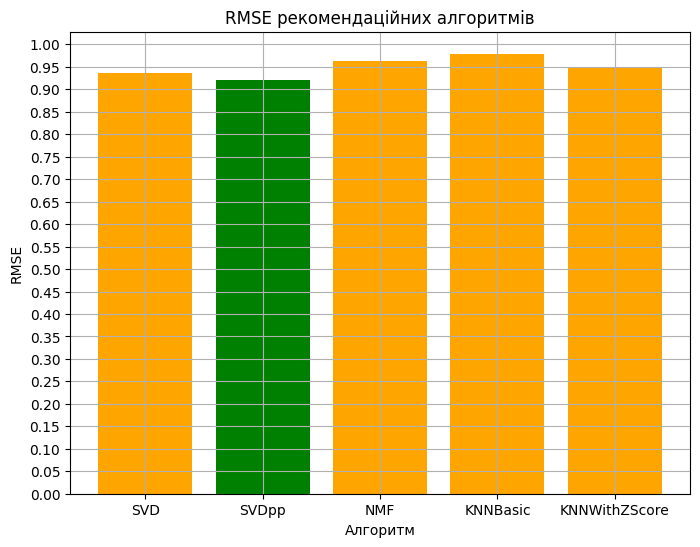

Оптимальний алгоритм: SVDpp
Його значення RMSE: 0.9196296031492881


In [10]:
plt.figure(figsize=(8, 6))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.grid()
plt.bar(algs, rmse_values, color=['orange' if alg != best_alg else 'green' for alg in algs])
plt.title('RMSE рекомендаційних алгоритмів')
plt.xlabel('Алгоритм')
plt.ylabel('RMSE')
plt.show()

print(f"Оптимальний алгоритм: {best_alg}\nЙого значення RMSE: {best_rmse}")